<a href="https://colab.research.google.com/github/igor531205/ml-course/blob/Task4/homework/multiclass_multioutput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Пушкарев Игорь Игоревич. Группа 23.М08-мм.
## Задача 4. Многоклассовая классификация и множественная классификация/регрессия.

 1.   ✅ Изучить [возможности sklearn](https://scikit-learn.org/stable/modules/multiclass.html#multiclass-classification) для решения задач Multiclass classification, Multilabel classification и Multioutput Regression. Основные компоненты библиотеки указаны на рисунке ниже.
 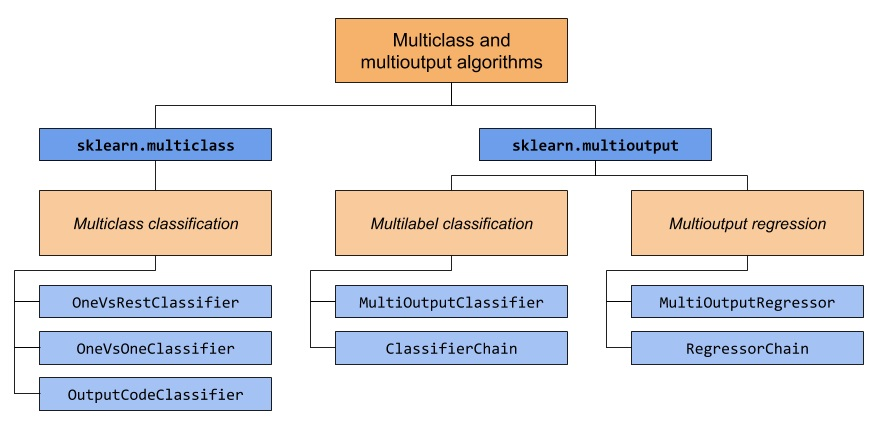

## Разведочный анализ данных - Exploratory Data Analysis (EDA)

2.   ✅ Взять данные, на которых можно решить задачу Multiclass classification (классификация с более чем двумя классами). В крайнем случае преобразуйте данные, предназначенные для другой задачи.

*Скачиваем* [Dry_Bean_Dataset.csv](https://www.kaggle.com/datasets/josegarban/beans-classification/)

Attribute Information:

1.   Area (**A**): площадь зоны компонента и количество пикселей в ее границах;
2.   Perimeter (**P**): окружность зерна определяется как длина его границы;
3.   Major axis length (**L**): расстояние между концами самой длинной линии, которую можно нарисовать из компонента;
4.   Minor axis length (**l**): самая длинная линия, которую можно провести от боба, стоя перпендикулярно главной оси;
5.   Aspect ratio (**K**): определяет соотношение между L и l;
6.   Eccentricity (**Ec**): эксцентриситет эллипса с теми же моментами, что и область;
7.   Convex area (**C**): количество пикселей в самом маленьком выпуклом многоугольнике, который может содержать площадь семени боба;
8.   Equivalent diameter (**Ed**): диаметр круга, имеющего ту же площадь, что и площадь семян фасоли;
9.   Extent (**Ex**): отношение пикселей в ограничительной рамке к области компонента;
10.   Solidity (**S**): также известна как выпуклость - соотношение пикселей в выпуклой оболочке с пикселями, находящимися в бобах;
11.   Roundness (**R**): вычисляется по следующей формуле (4piA)/(P^2);
12.   Compactness (**CO**): измеряет округлость объекта (Ed/L);
13.   ShapeFactor1 (**SF1**): фактор формы;
14.   ShapeFactor2 (**SF2**): фактор формы;
15.   ShapeFactor3 (**SF3**): фактор формы;
16.   ShapeFactor4 (**SF4**): фактор формы;
17.   Class: (**Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira**).

3.   ✅ Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи.

In [2]:
from google.colab import files

link = 'dry_bean.csv' # переименованный Dry_Bean_Dataset.csv
uploaded = files.upload_file(link) # Загружаем файл Dry_Bean_Dataset.csv

Saved dry_bean.csv to /content/dry_bean.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as warn

# для работы с графиками в интерактивном режиме
%matplotlib inline

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

# отключаем предупреждения
warn.filterwarnings('ignore')

In [4]:
df=pd.read_csv(link, index_col=False) # Считываем данные

pd.options.display.max_columns = None # Отключаем ограничение в отображении столбцов

df.head(n=5) # Выводим 5 строк

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610291.00,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638018.00,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.11,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645884.00,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620134.00,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.columns # Выведем все столбцы

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [5]:
df.shape # Размеры таблицы: (кол-во строк, кол-во столбцов)

(13611, 17)

In [6]:
df.describe() # Основная информация по количественным признакам

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,1.361100e+04,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,7.729110e+05,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,3.238848e+05,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,5.536000e+02,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,6.769955e+05,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,7.722730e+05,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,9.555000e+05,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1.921685e+06,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


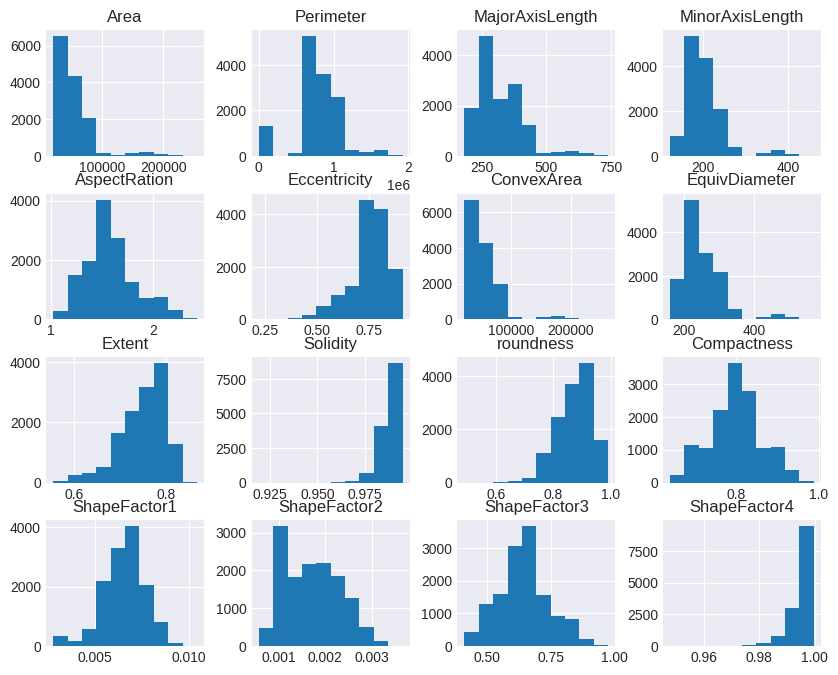

In [31]:
df.hist(figsize=(10, 8)); # Графическое отображение количественных признаков

In [8]:
df.info() # Тип признаков и количество значений

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.nunique() # Проверяем количество уникальных значений

Area               12011
Perimeter          13351
MajorAxisLength    13543
MinorAxisLength    13543
AspectRation       13543
Eccentricity       13543
ConvexArea         12066
EquivDiameter      12011
Extent             13535
Solidity           13526
roundness          13543
Compactness        13543
ShapeFactor1       13543
ShapeFactor2       13543
ShapeFactor3       13543
ShapeFactor4       13543
Class                  7
dtype: int64

In [10]:
df.isnull().sum() # Проверяем общее количество пропущенных значений

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [7]:
print(df['Class'].unique()) # Проверяем уникальные значения Class

['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


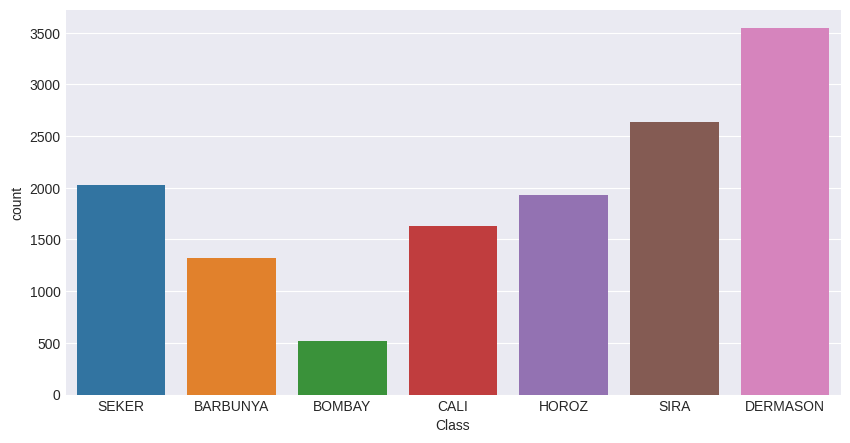

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Class')
plt.show()

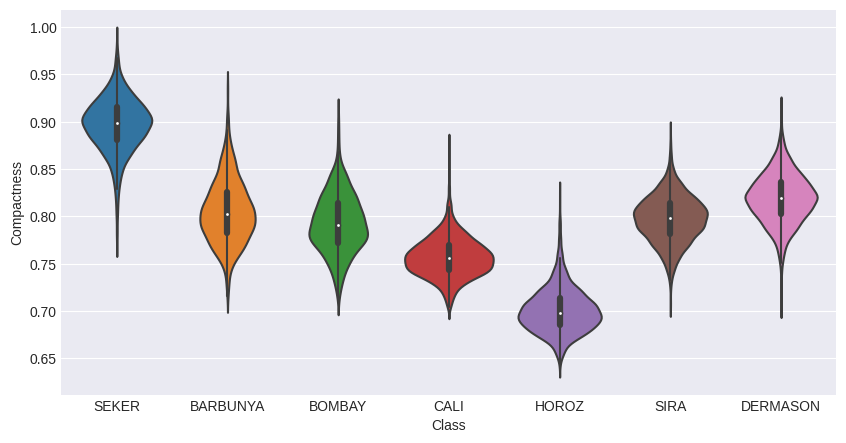

In [28]:
plt.figure(figsize=(10,5))
sns.violinplot(x=df.Class, y=df.Compactness)
plt.show()

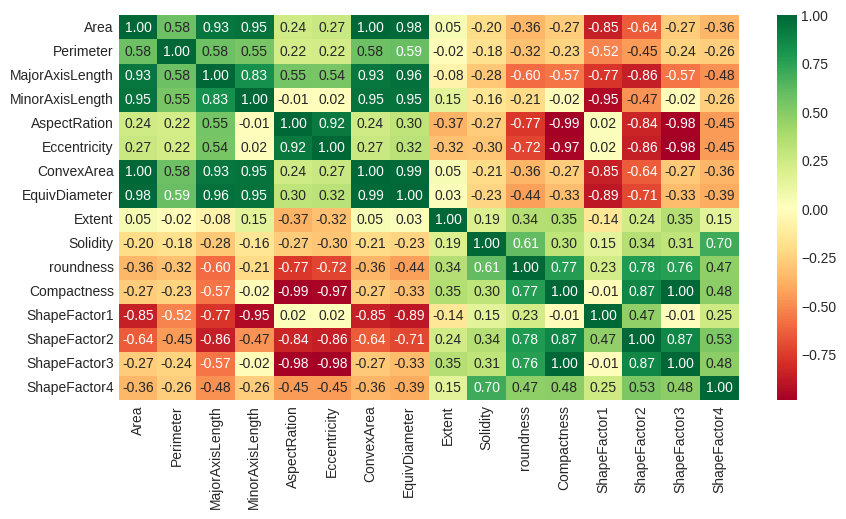

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') # Корреляция признаков
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

4.   ✅ При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).

In [5]:
from sklearn.preprocessing import LabelEncoder

# Закодируем целевые признаки в цифровой формат
label_encoder = LabelEncoder()
class_list = df['Class'].unique()
df['Class'] = label_encoder.fit_transform(df['Class'])

print(df['Class'].unique()) # Проверяем уникальные значения Class

[5 0 1 2 4 6 3]


In [6]:
# Разбиение данных с использованием train_test_split и масштабирование
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Class']
X = df.drop(columns=['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

((9527, 16), (4084, 16), (9527,), (4084,))

5.   ✅ Используя стратегии OneVsRest, OneVsOne и OutputCode решите задачу Multiclass classification для каждого из пройденных базового алгоритма классификации (logistic regression, svm, knn, naive bayes, decision tree). При обучении использовать подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания.

In [7]:
# Библиотечные реализации logistic regression, svm, knn, naive bayes, decision tree.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

models = {
    'Logistic Regression': {
        'model': LogisticRegression,
        'params': {
            'C': [0.1, 1, 10, 100],
            'solver': ['liblinear', 'lbfgs']
        }
    },
    'SVM': {
        'model': SVC,
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier,
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB,
        'params': {}
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier,
        'params': {
            'max_depth': [1, 5, 10, 20],
            'min_samples_split': [2, 4, 6]
        }
    }
}

print(*[model['params'] for model_name, model in models.items()], sep='\n')

{'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
{'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
{'n_neighbors': [3, 5, 7, 9], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
{}
{'max_depth': [1, 5, 10, 20], 'min_samples_split': [2, 4, 6]}


In [8]:
# Поиск по сетке с помощью GridSearchCV.
from sklearn.model_selection import GridSearchCV

# Создаем пустой словарь, чтобы хранить обученные модели
tuned_models = {}

# Цикл для подборf параметров GridSearchCV во всех моделях
for model_name, model in models.items():

    # Подбор параметров GridSearchCV
    grid_search = GridSearchCV(model['model'](), model['params'], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    # Сохранение оптимальных параметров
    models[model_name]['params'] = grid_search.best_params_

print(*[model['params'] for model_name, model in models.items()], sep='\n')

{'C': 10, 'solver': 'lbfgs'}
{'C': 10, 'kernel': 'rbf'}
{'algorithm': 'auto', 'n_neighbors': 9}
{}
{'max_depth': 10, 'min_samples_split': 6}


Logistic Regression optimal number of features: 15
Logistic Regression selected features: ['Area', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']

Decision Tree optimal number of features: 10
Decision Tree selected features: ['MajorAxisLength', 'MinorAxisLength', 'ConvexArea', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'ShapeFactor4']



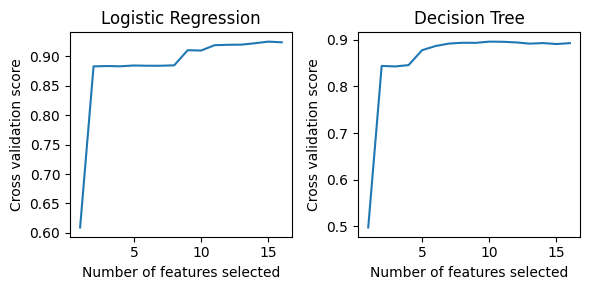

In [9]:
# Выбор оптимального количества признаков кросс-валидацией с помощью RFECV
from sklearn.feature_selection import RFECV

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(6, 3))
axes = axes.flatten()

for i, name in enumerate(['Logistic Regression', 'Decision Tree']):
    rfecv = RFECV(estimator=models[name]['model'](), step=1, cv=5, scoring='accuracy')
    rfecv.fit(X_train_scaled, y_train)

    print(f'{name} optimal number of features: {rfecv.n_features_}')
    print(f'{name} selected features: {list(X_train.columns[rfecv.support_])}\n')

    axes[i].plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
    axes[i].set_title(f'{name}')
    axes[i].set_xlabel('Number of features selected')
    axes[i].set_ylabel('Cross validation score')

plt.tight_layout()
plt.show()

In [10]:
# Стратегии OneVsRest, OneVsOne и OutputCode
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier, OutputCodeClassifier

multi_class_strategies = {
    "OneVsRest": OneVsRestClassifier,
    "OneVsOne": OneVsOneClassifier,
    "OutputCode": OutputCodeClassifier
}

6.   ✅ Замерить время обучения каждой модели для каждой стратегии.

In [11]:
# Обучение моделей.
import time

# Создаем пустые словари, чтобы хранить обученные модели и время обучения для каждой модели
tuned_models = {}
training_times = {}

# Цикл для обучения моделей
for model_name, model in models.items():
    # Цикл для обучения разным стратегиям мультиклассовой классификации
    for strategy_name, strategy_class in multi_class_strategies.items():

        # Создаем экземпляр модели с подобранными параметрами
        model_instance = model['model'](**model['params'])

        # Создание объекта стратегии мультиклассовой классификации
        classifier = strategy_class(model_instance)

        # Засекаем время начала обучения
        start_time = time.time()

        # Обучение модели
        classifier.fit(X_train_scaled, y_train)

        # Засекаем время окончания обучения
        end_time = time.time()

        # Вычисляем время обучения
        training_time = end_time - start_time

        name = f'{model_name} - {strategy_name}'
        # Сохраняем время обучения в словаре
        training_times[name] = training_time

        # Сохраняем модель в словаре
        tuned_models[name] = classifier

print(*[f'{model_name}: {time:.2f} s' for model_name, time in training_times.items()], sep='\n')

Logistic Regression - OneVsRest: 0.71 s
Logistic Regression - OneVsOne: 0.53 s
Logistic Regression - OutputCode: 0.93 s
SVM - OneVsRest: 2.15 s
SVM - OneVsOne: 0.65 s
SVM - OutputCode: 6.69 s
KNN - OneVsRest: 0.02 s
KNN - OneVsOne: 0.03 s
KNN - OutputCode: 0.03 s
Naive Bayes - OneVsRest: 0.03 s
Naive Bayes - OneVsOne: 0.05 s
Naive Bayes - OutputCode: 0.04 s
Decision Tree - OneVsRest: 0.95 s
Decision Tree - OneVsOne: 0.54 s
Decision Tree - OutputCode: 1.57 s


7.   ✅ Для оценки качества моделей используйте метрику AUC-ROC.

In [29]:
# Оценка качества моделей метрикой AUC-ROC
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Функция вывода кривой AUC-ROC
def plot_roc_curve(y_test, y_pred, class_list, name, axes):

  n_classes = len(class_list)
  _y_test = label_binarize(y_test.copy(), classes=np.arange(n_classes))
  _y_pred = label_binarize(y_pred.copy(), classes=np.arange(n_classes))

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(_y_test[:, i], _y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

  mean = 0.0
  for i, cls in zip(range(n_classes), class_list):
    axes.plot(fpr[i], tpr[i], label=f'{cls} = {roc_auc[i]:0.2f}',)
    mean += roc_auc[i]
  mean = mean / n_classes

  axes.plot([0, 1], [0, 1], 'k--')
  axes.set_xlabel('False Positive Rate')
  axes.set_ylabel('True Positive Rate')
  axes.set_title(f'{name}\nAUC-ROC curve {mean:0.2f}')
  axes.legend()

def plt_row(tuned_models_items):
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(9, 3))
  axes = axes.flatten()

  # Цикл для каждой модели
  for i, (name, model) in enumerate(tuned_models_items):

      y_score = model.predict(X_test_scaled)

      plot_roc_curve(y_test, y_score, class_list, name, axes[i])

  plt.tight_layout()
  plt.show()

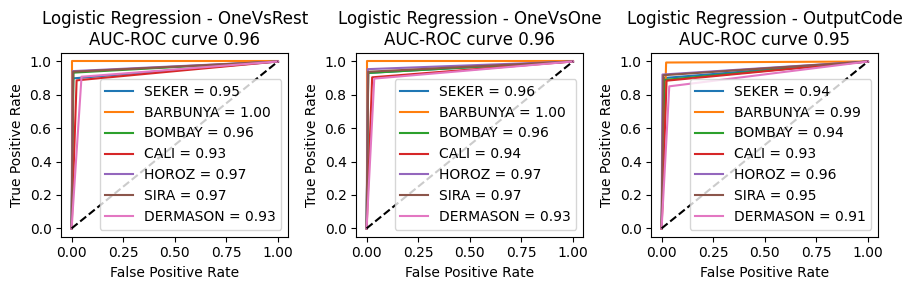

In [31]:
tuned_models_items = list(tuned_models.items())
plt_row(tuned_models_items[:3])

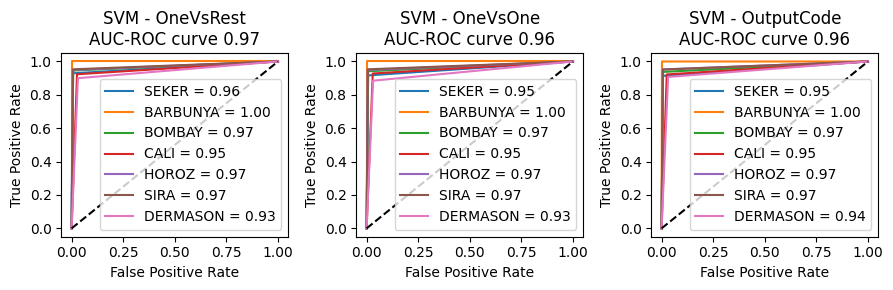

In [32]:
plt_row(tuned_models_items[3:6])

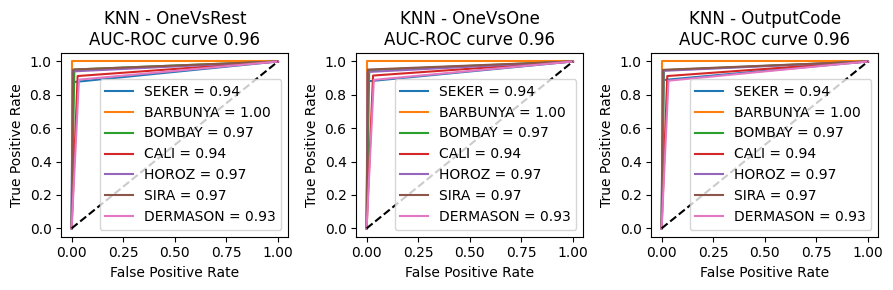

In [33]:
plt_row(tuned_models_items[6:9])

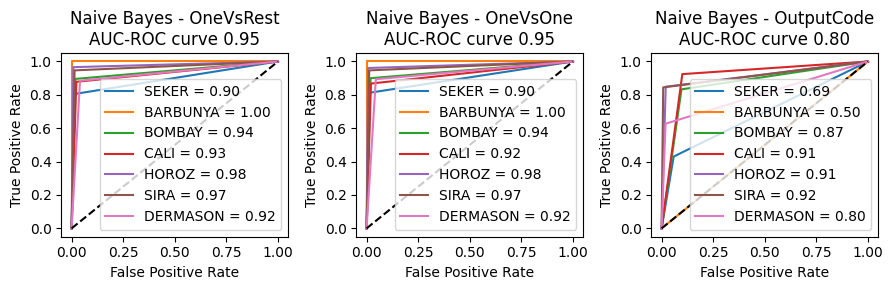

In [34]:
plt_row(tuned_models_items[9:12])

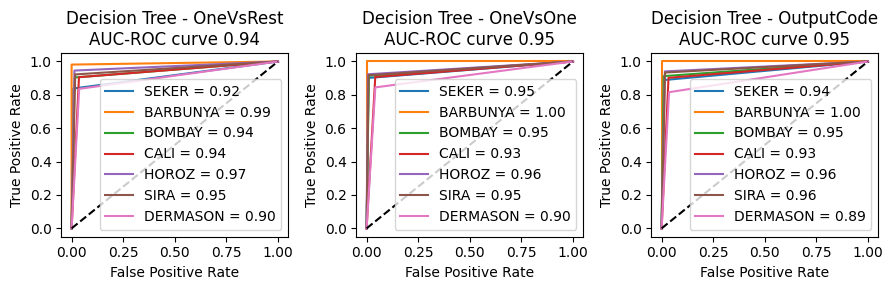

In [35]:
plt_row(tuned_models_items[12:15])

 9.   ✅ Сравнить время обучения и качество всех моделей и всех стратегий. Сделать выводы.

По времени обучения лучшие результаты показали классификция - метрика:

*   KNN - OneVsRest с результатом 0.02 s
*   KNN - OneVsOne с результатом 0.03 s
*   KNN - OutputCode с результатом 0.03 s
*   Naive Bayes - OneVsRest с результатом 0.03 s

По качеству предсказания лучший результат показали классификция - метрика:

*   SVM - OneVsRest с результатом 0.97
*   SVM - OneVsOne с результатом 0.96
*   SVM - OutputCode с результатом 0.96
*   KNN - OneVsRest с результатом 0.96
*   KNN - OneVsOne с результатом 0.96
*   KNN - OutputCode с результатом 0.96
*   Logistic Regression - OneVsRest с результатом 0.96
*   Logistic Regression - OneVsOne с результатом 0.96

Оптимальным вариантом для подобранных данных оказалась модель KNN в сочетании с любой из стратегий. Лучший результат предсказания показала модель SVM в сочетании со стратегией OneVsRest.